### Installation

In [1]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("chromVAR", version = "3.8")
# BiocManager::install("motifmatchr", version = "3.8")
# BiocManager::install("BSgenome.Hsapiens.UCSC.hg19", version = "3.8")
# BiocManager::install("JASPAR2016", version = "3.8")

###  Import packages

In [2]:
library(chromVAR)
library(motifmatchr)
library(Matrix)
library(SummarizedExperiment)
library(BiocParallel)
library('JASPAR2016')
library(BSgenome.Hsapiens.UCSC.hg19)


Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:Matrix’:

    colMeans, colSums, rowMeans, rowSums, which

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, r

In [3]:
packageVersion("chromVAR")

[1] ‘1.4.1’

In [4]:
register(MulticoreParam(10))

### Obtain Feature Matrix

In [5]:
start_time <- Sys.time()

In [6]:
set.seed(2019)

In [7]:
metadata <- read.table('../../input/metadata.tsv',
                         header = TRUE,
                         stringsAsFactors=FALSE,quote="",row.names=1)

In [8]:
peakfile <- "../../input/GSE96769_PeakFile_20160207.bed"
peaks <- getPeaks(peakfile, sort_peaks = TRUE)

Peaks sorted


`width=500` will cause the error: Error in loadFUN(x, seqname, ranges): trying to load regions beyond the boundaries of non-circular sequence "chr17"

In [9]:
peaks <- resize(peaks, width = 450, fix = "center")

In [10]:
bamfile <- list.files(path = "../../input/sc-bams_nodup/", pattern = "\\.bam$")

In [11]:
length(bamfile)

[1] 2034

In [12]:
cellnames <- sapply(strsplit(bamfile,'.',fixed = TRUE), "[[", 1)

In [13]:
head(cellnames)

[1] "BM1077-CLP-Frozen-160106-13" "BM1077-CLP-Frozen-160106-14"
[3] "BM1077-CLP-Frozen-160106-2"  "BM1077-CLP-Frozen-160106-21"
[5] "BM1077-CLP-Frozen-160106-27" "BM1077-CLP-Frozen-160106-3"

In [14]:
sum(cellnames == rownames(metadata))

[1] 2034

In [15]:
fragment_counts <- getCounts(paste0("../../input/sc-bams_nodup/",bamfile), 
                             peaks, 
                             paired =  TRUE, 
                             by_rg = TRUE, 
                             format = "bam", 
                             colData = data.frame(celltype = cellnames))

Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-13.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-14.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-2.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-21.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-27.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-3.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-36.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-42.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-44.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-61.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CLP-Frozen-160106-62.dedup.s

Reading in file: ../../input/sc-bams_nodup/BM1077-CMP-Frozen-160106-89.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CMP-Frozen-160106-91.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CMP-Frozen-160106-92.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-CMP-Frozen-160106-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-1.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-10.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-11.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-14.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-16.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-20.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-21.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-GMP-Frozen-160107-22.dedup.

Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-5.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-51.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-53.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-54.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-55.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-56.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-57.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-58.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-59.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-HSC-Frozen-160105-6.dedup.s

Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-71.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-72.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-73.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-74.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-75.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160107-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-LMPP-Frozen-160

Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-40.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-41.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-42.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-43.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-45.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-46.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-47.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-48.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-5.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/BM1077-MPP-Frozen-160105-51.dedup.

Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-85.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-89.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-92.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160808-scATAC-BM1137-GMP2mid-LS-96.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160809-scATAC-BM1137-GMP1low-LS-1.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160809-scATAC-BM1137-GMP1low-LS-11.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160809-scATAC-BM1137-GMP1low-LS-13.dedup.st.bam
Reading in 

Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-21.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-22.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-23.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-24.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-25.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-26.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-27.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-3.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-31.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-32.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160818-BM1137-pDC-LS-34.dedup.st.bam
Reading in file: ../../input/sc-b

Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-47.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-51.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-52.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-54.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-59.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-6.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-60.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-61.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160819-BM1137-CMP-LS-62.dedup.st.bam
Reading in file: ../../input/sc-b

Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-75.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-79.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-84.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-160822-BM1137-CMP-LS-85.dedup.st.bam
Reading in file: ../../input/sc-b

Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-15.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-16.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-19.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-2.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-20.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-21.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-22.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-23.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-25.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160617-scATAC-BM1214-CMP-LS-26.dedup.st.bam
Reading in file: ../../input/sc

Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-30.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-31.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-32.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-33.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-34.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-35.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-36.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-39.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-GMP3high-HYC-4.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1137-

Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-40.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-42.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-43.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-47.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-48.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-5.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-50.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-51.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-20160726-scATAC-BM1214-CMP-LS-52.dedup.st.bam
Reading in file: ../../input/sc

Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-73.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-74.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-75.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-79.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-LS-160219-85.dedup.st.bam
Reading in file: ../../input/sc-b

Reading in file: ../../input/sc-bams_nodup/singles-BM0106-HSC-SIM-160219-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-10.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-11.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-12.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-13.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-14.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-16.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-17.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-18.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-19.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-160418-2.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0106-UNK-

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-62.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-64.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-65.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-67.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-68.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-7.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-71.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-73.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-79.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CLP-frozen-151103-8.ded

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-86.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-87.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-89.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-90.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-91.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-92.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-CMP-frozen-151118-96.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-GMP-151027-11.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-GMP-151027-12.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-GMP-151027-13.dedup.st.bam
Reading i

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-30.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-31.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-32.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-33.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-34.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-35.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-37.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-38.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-39.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-4.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-fresh-151027-40.dedup.st.bam


Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-69.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-70.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-71.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-72.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-74.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-HSC-frozen-151027-84.d

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-79.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-80.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-84.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-85.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-86.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-151105-87.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-LMPP-frozen-1

Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-4.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-40.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-41.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-42.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-43.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-44.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-47.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-48.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-49.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-5.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM0828-MPP-frozen-151103-50.ded

Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-62.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-63.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-64.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-65.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-66.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-67.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-68.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-69.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-7.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-70.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-160421-71.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-GMP-1604

Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-74.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-75.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-76.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-77.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-78.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-86.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-87.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-BM1214-MCP-frozen-160128-88.de

Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-8.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-81.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-82.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-83.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-84.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-85.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-86.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-89.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-90.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-95.dedup.st.bam
Reading in file: ../../input/sc-bams_nodup/singles-PB1022-mono-160128-96.dedup.st.bam


In [16]:
fragment_counts

class: RangedSummarizedExperiment 
dim: 491437 2034 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(0):
colnames(2034): BM1077-CLP-Frozen-160106-13 BM1077-CLP-Frozen-160106-14
  ... singles-PB1022-mono-160128-95 singles-PB1022-mono-160128-96
colData names(2): celltype depth

In [17]:
fragment_counts <- addGCBias(fragment_counts, genome = BSgenome.Hsapiens.UCSC.hg19)

In [18]:
head(rowData(fragment_counts))

DataFrame with 6 rows and 1 column
               bias
          <numeric>
1 0.673333333333333
2 0.582222222222222
3 0.522222222222222
4 0.782222222222222
5              0.46
6               0.4

In [19]:
counts_filtered <- filterPeaks(fragment_counts, non_overlapping = TRUE)

In [20]:
bg <- getBackgroundPeaks(counts_filtered)
# Potentially save the bg object
saveRDS(bg, file = "background_peaks_kmers.rds")

In [21]:
kmer_ix <- matchKmers(6, counts_filtered, genome = BSgenome.Hsapiens.UCSC.hg19)

In [22]:
dev <- computeDeviations(object = counts_filtered, annotations = kmer_ix,
                         background_peaks = bg)

In [23]:
end_time <- Sys.time()

In [24]:
end_time - start_time

Time difference of 35.83708 mins

In [25]:
df_zscores = dev@assays[[1]]

In [27]:
saveRDS(df_zscores, file = '../../output/feature_matrices/FM_ChromVAR_buenrostro2018bulkpeaks_kmers.rds')

### Downstream Analysis

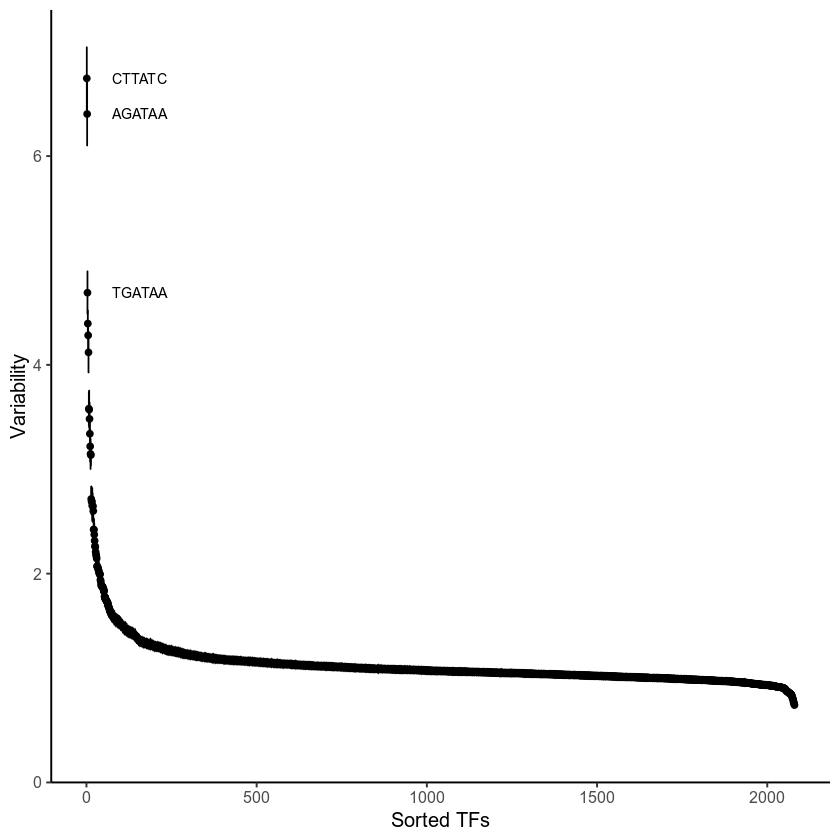

In [28]:
variability <- computeVariability(dev)
plotVariability(variability, use_plotly = FALSE)

In [29]:
head(variability)
dim(variability)

,name,variability,bootstrap_lower_bound,bootstrap_upper_bound,p_value,p_value_adj
AAAAAA,AAAAAA,1.1532917,1.1127742,1.188619,5.997011e-22,2.470056e-21
AAAAAC,AAAAAC,1.1138433,1.0758818,1.151915,4.618724e-13,1.392311e-12
AAAAAG,AAAAAG,1.0456913,1.0115104,1.079335,1.851835e-03,3.018664e-03
AAAAAT,AAAAAT,1.0239106,0.9932099,1.055664,6.312049e-02,8.925263e-02
AAAACA,AAAACA,0.9938471,0.9579040,1.031583,6.488731e-01,7.828631e-01
AAAACC,AAAACC,1.0882450,1.0539891,1.122488,1.356021e-08,3.287325e-08


[1] 2080    6

In [30]:
dev$celltype <- metadata[colnames(dev),]

In [31]:
tsne_results <- deviationsTsne(dev, threshold = 1.5, perplexity = 10)

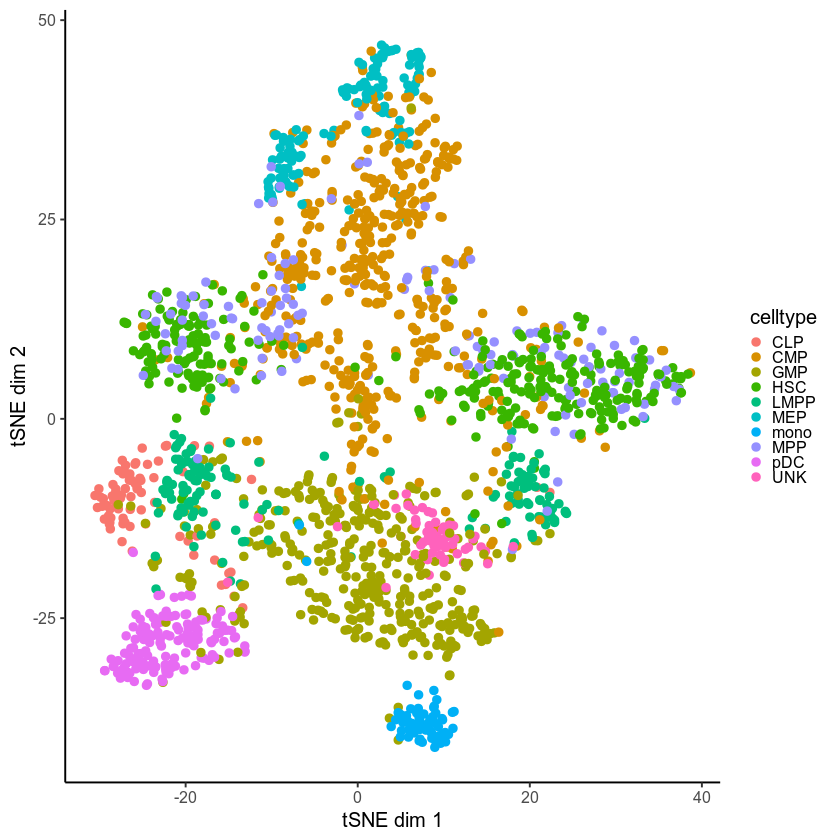

In [32]:
tsne_plots <- plotDeviationsTsne(dev, tsne_results, 
                                 sample_column = "celltype", 
                                 shiny = FALSE)
tsne_plots[[1]]

In [33]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data/pinello/SHARED_SOFTWARE/anaconda3/envs/ATACseq_chromVAR/lib/R/lib/libRblas.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] BSgenome.Hsapiens.UCSC.hg19_1.4.0 BSgenome_1.50.0                  
 [3] rtracklayer_1.42.2                Biostrings_2.50.2                
 [5] XVector_0.22.0                    JASPAR2016_1.10.0                
 [7] SummarizedExperiment_1.12.0 

In [34]:
save.image(file = 'ChromVAR_buenrostro2018bulkpeaks_kmers.RData')